In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
train = pd.read_csv('train.csv')
train.describe()

,age,ext_tooth,time_min,mmo,height,weight,bmi
count,432.000000,432.000000,432.000000,432.000000,427.000000,427.000000,427.000000
mean,28.733796,43.046296,13.465278,39.888889,167.718970,64.782201,22.874793
std,11.163662,5.005583,8.298587,5.416454,8.490851,14.048269,3.798936
min,15.000000,38.000000,1.000000,21.000000,144.000000,35.000000,15.943880
25%,21.000000,38.000000,8.000000,35.000000,161.000000,54.000000,20.121972
50%,24.000000,48.000000,12.000000,40.000000,167.000000,61.000000,22.038567
75%,35.000000,48.000000,17.000000,43.000000,174.000000,74.000000,24.897060
max,79.000000,48.000000,50.000000,55.000000,188.000000,120.000000,37.637849


In [13]:
train = train.drop(columns=['filename','date','ID'])
train

,operator,sex,age,ext_tooth,time_min,mmo,height,weight,bmi
0,A,F,40,48,2,35,160.0,54.0,21.093750
1,K,F,55,38,7,39,156.0,60.0,24.654832
2,A,M,47,38,26,43,174.0,72.0,23.781213
3,K,M,18,38,12,49,181.0,66.0,20.145905
4,A,M,20,38,30,46,182.0,60.0,18.113754
...,...,...,...,...,...,...,...,...,...
427,Y,F,21,38,15,40,160.0,65.0,25.390625
428,A,M,20,38,4,42,177.0,80.0,25.535446
429,A,F,26,38,11,38,154.0,50.0,21.082813
430,A,M,55,38,3,40,165.0,70.0,25.711662


In [14]:
train.head()

,operator,sex,age,ext_tooth,time_min,mmo,height,weight,bmi
0,A,F,40,48,2,35,160.0,54.0,21.093750
1,K,F,55,38,7,39,156.0,60.0,24.654832
2,A,M,47,38,26,43,174.0,72.0,23.781213
3,K,M,18,38,12,49,181.0,66.0,20.145905
4,A,M,20,38,30,46,182.0,60.0,18.113754


In [15]:
train.isna().sum()

operator     0
sex          0
age          0
ext_tooth    0
time_min     0
mmo          0
height       5
weight       5
bmi          5
dtype: int64

C:\Users\ChoiWonseok\AppData\Local\Temp\ipykernel_26104\377777483.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(train.corr())
C:\Users\ChoiWonseok\AppData\Local\Temp\ipykernel_26104\377777483.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),mask = mask, annot = True, cmap = 'Blues',)


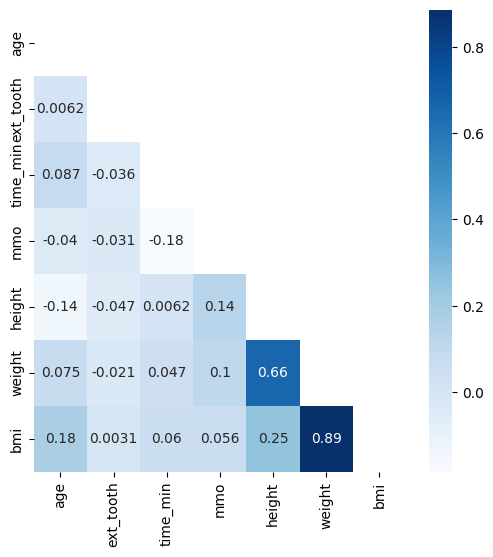

In [17]:
plt.figure(figsize = (6,6))

mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(),mask = mask, annot = True, cmap = 'Blues',)
plt.show()

In [19]:
columns = train.columns
list(columns)

['operator',
 'sex',
 'age',
 'ext_tooth',
 'time_min',
 'mmo',
 'height',
 'weight',
 'bmi']

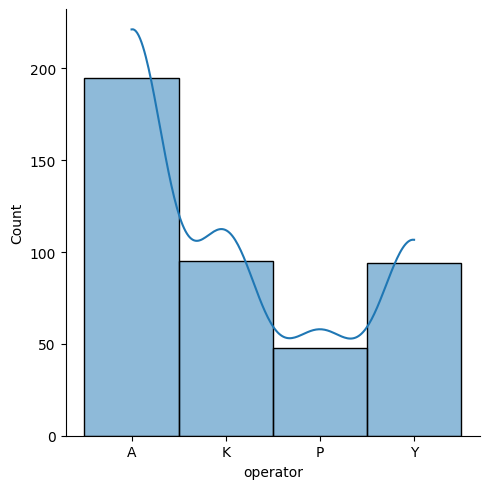

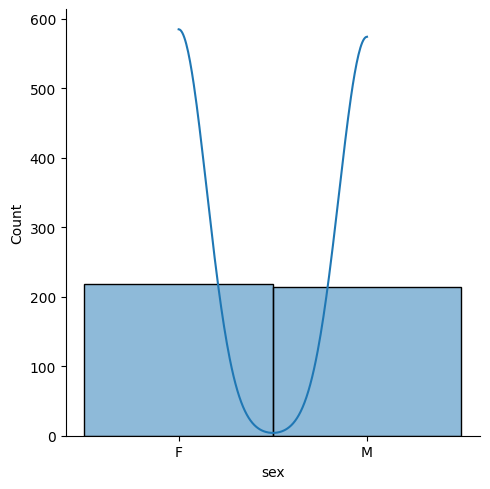

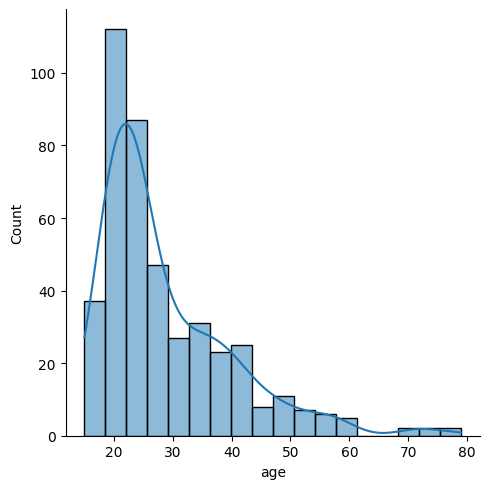

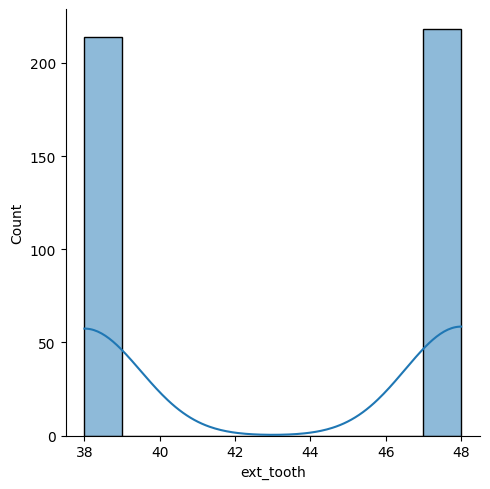

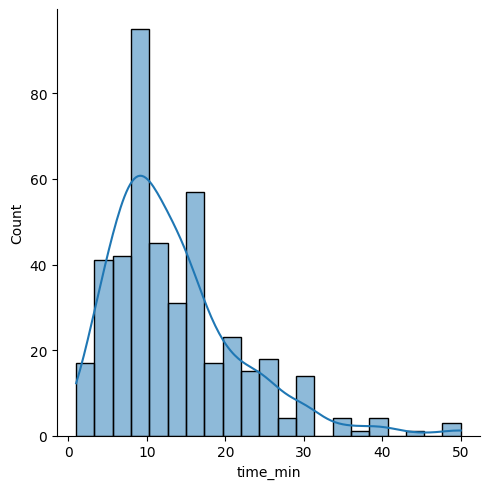

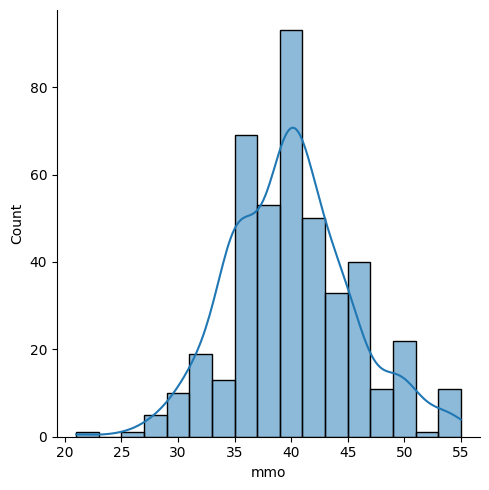

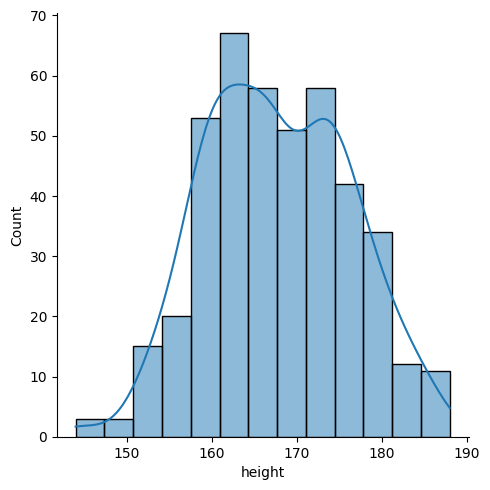

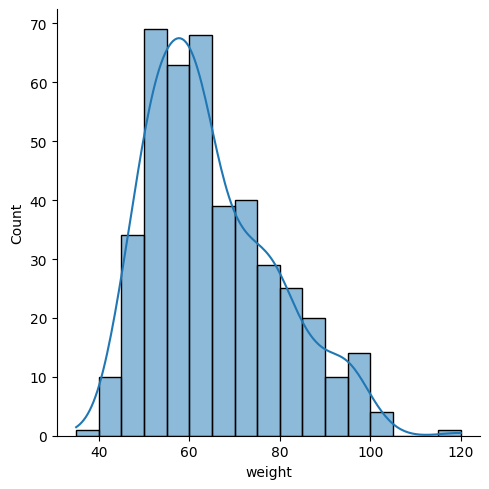

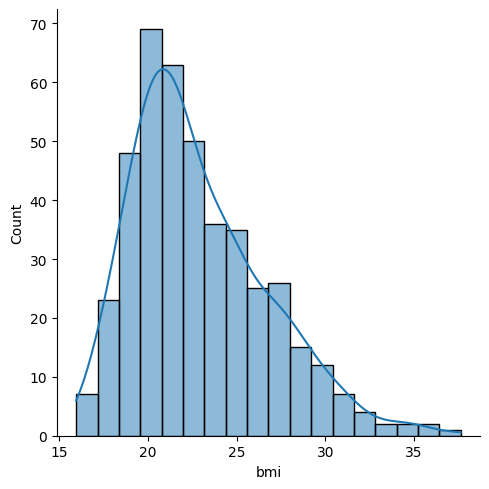

In [20]:
for col in list(columns):
    sns.displot(data=train, x=col, kde=True)

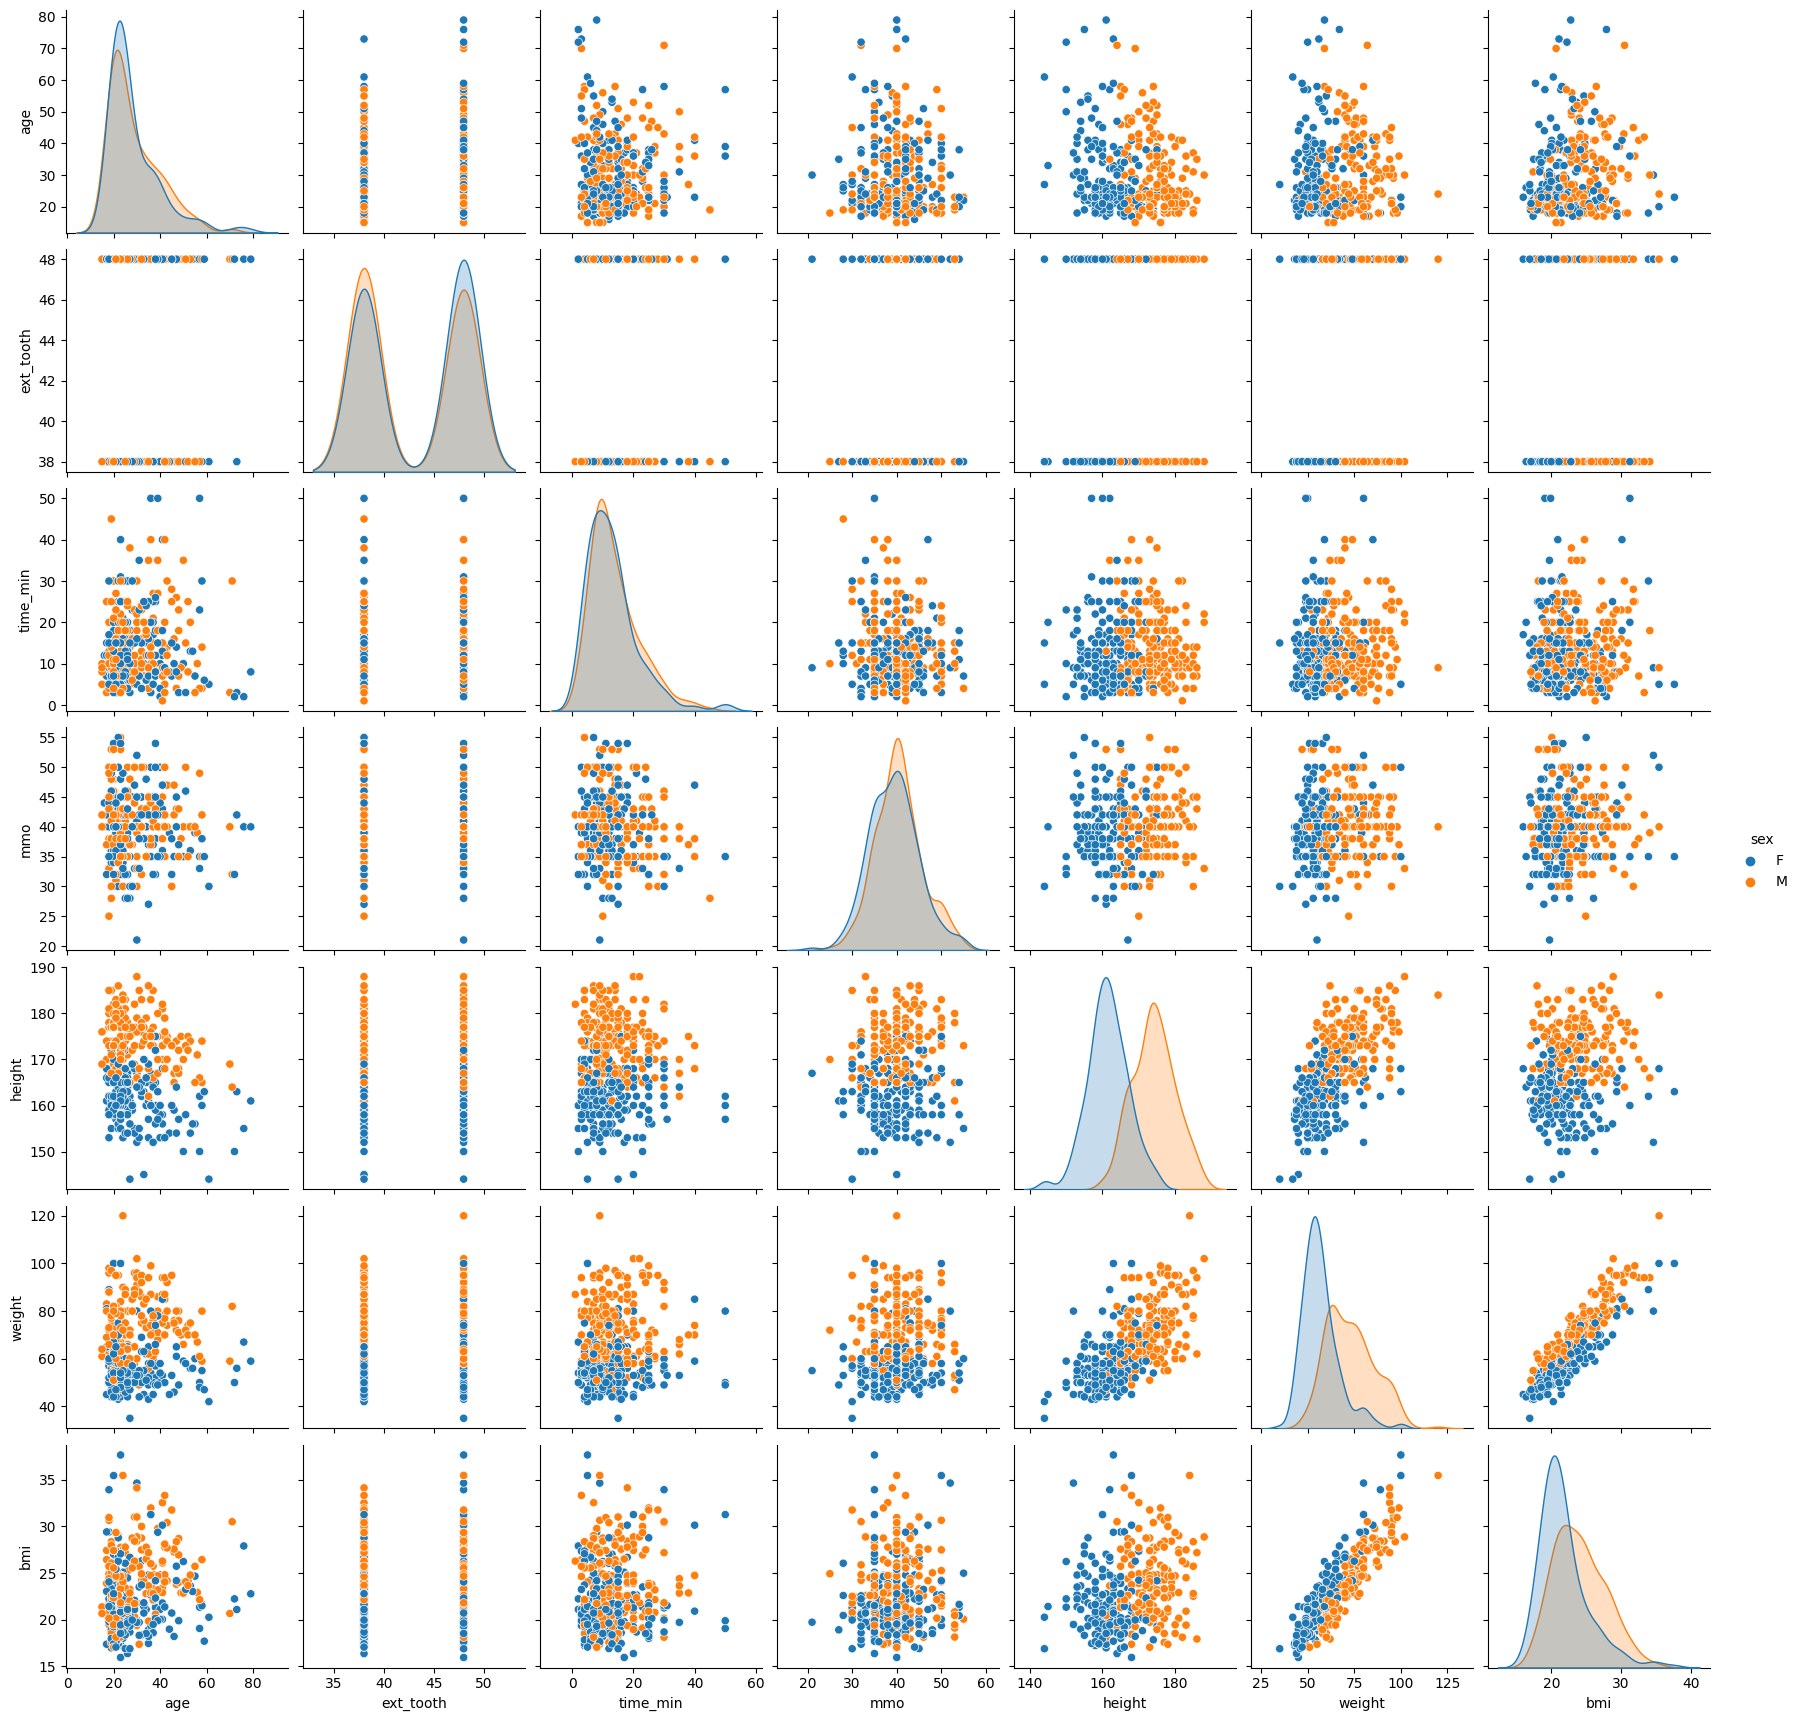

In [37]:
sns.pairplot(data = train,hue = "sex")

In [38]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.08, shuffle=True, random_state=41)

In [42]:
train = train.reset_index(drop=True)
val = val.reset_index(drop=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

ordinal_features = ['operator', 'sex']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    # train데이터에서 존재하지 않았던 값이 val 데이터에 존재할 수도 있습니다.
    # 따라서 val 데이터를 바로 변형시키지 않고 고유값을 확인후 val 데이터를 변환합니다.
    # Data Leakage를 발생시키지 않기 위함이니, 반드시 주의해주세요.
    for label in np.unique(val[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    val[feature] = le.transform(val[feature])

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
scaler = StandardScaler()

std_train = pd.DataFrame(scaler.fit_transform(train.drop(columns='time_min')), columns=list(train.drop(columns='time_min').columns))
std_val = pd.DataFrame(scaler.transform(val.drop(columns='time_min')), columns=list(val.drop(columns='time_min').columns))

std_train['time_min'] = train['time_min']
std_val['time_min'] = val['time_min']

In [47]:
std_train

,operator,sex,age,ext_tooth,mmo,height,weight,bmi,time_min
0,-0.902773,-0.962904,1.607060,0.977581,0.022427,-0.413406,0.025883,0.337624,8
1,-0.061456,-0.962904,-0.779154,0.977581,-0.905035,-0.295804,0.168784,0.453873,15
2,-0.902773,1.038525,1.076790,-1.022933,-0.348558,0.645009,0.383136,0.133146,7
3,-0.061456,-0.962904,0.016251,0.977581,-1.276020,0.057001,-0.688624,-0.891703,9
4,1.621178,-0.962904,-0.955910,-1.022933,-0.905035,-1.119015,-0.331371,0.302807,11
...,...,...,...,...,...,...,...,...,...
392,0.779861,1.038525,2.579221,0.977581,0.393412,0.762610,1.097642,0.930305,14
393,-0.902773,-0.962904,-0.867532,0.977581,0.022427,-1.119015,-0.831525,-0.433716,7
394,-0.061456,-0.962904,-0.337262,-1.022933,-0.348558,-1.119015,-1.331679,-1.170240,12
395,-0.902773,1.038525,-0.425640,-1.022933,-0.905035,1.821025,0.025883,-0.912086,4


In [49]:
std_val.head()

,operator,sex,age,ext_tooth,mmo,height,weight,bmi,time_min
0,1.621178,1.038525,-0.425640,0.977581,-1.832497,0.292204,-0.331371,-0.556992,25
1,-0.061456,-0.962904,-0.337262,0.977581,0.578905,-0.531007,-0.688624,-0.572865,9
2,-0.902773,1.038525,-0.072127,-1.022933,-0.534050,0.527407,1.454895,1.536583,16
3,-0.902773,1.038525,-0.690775,0.977581,-0.534050,0.057001,-0.902976,-1.170896,9
4,0.779861,1.038525,0.281386,0.977581,1.877352,1.821025,1.955050,1.205614,24


In [33]:
hyperparams = {
	'NN_TORCH': {},
	'GBM': [{}, 'GBMLarge'], # 'num_iteration':50000
	'CAT': {'iterations':10000,'learning_rate':0.2,'depth':10,'eval_metric':'MAE','loss_function' : 'RMSE','bagging_temperature' : 0.2,'od_type':'Iter','metric_period' : 50,'l2_leaf_reg':30},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],
}

fit_parameters = {
    'presets': 'best_quality',
    # # # 'num_bag_folds': 10,  
    # # # 'num_bag_sets': 5,  
    'num_stack_levels': 2,  
    'hyperparameters':hyperparams,
    # 'excluded_model_types': ['NN_TORCH','KNN','FASTAI'],   
}

In [34]:
from autogluon.tabular import TabularPredictor, TabularDataset

predictor = TabularPredictor(label='time_min', eval_metric='mape', problem_type='regression').fit(train, **fit_parameters)

No path specified. Models will be saved in: "AutogluonModels\ag-20231122_053837\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=5, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20231122_053837\"
AutoGluon Version:  0.7.0
Python Version:     3.10.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    432
Train Data Columns: 8
Label Column: time_min
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    8248.69 MB
	Train Data (Original)  Memory Usage: 0.07 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype a

In [35]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-0.380765,0.930966,42.682491,0.001001,0.360002,3,True,20
1,WeightedEnsemble_L4,-0.381538,1.616578,93.267409,0.000996,0.391002,4,True,29
2,NeuralNetTorch_BAG_L3,-0.383547,1.577579,90.921415,0.160002,7.206276,3,True,27
3,WeightedEnsemble_L2,-0.388256,0.153424,9.337940,0.001002,0.596999,2,True,11
4,XGBoost_BAG_L2,-0.392008,0.794955,34.057861,0.037012,1.993001,2,True,17
5,NeuralNetTorch_BAG_L1,-0.403662,0.087993,5.458996,0.087993,5.458996,1,True,9
6,XGBoost_BAG_L1,-0.408445,0.037002,1.445998,0.037002,1.445998,1,True,8
7,NeuralNetTorch_BAG_L2,-0.412176,0.864957,38.121403,0.107013,6.056543,2,True,18
8,XGBoost_BAG_L3,-0.420423,1.455580,85.670130,0.038003,1.954992,3,True,26
9,NeuralNetFastAI_BAG_L2,-0.476525,0.857958,38.086627,0.100014,6.021767,2,True,16
